Import required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Explorotary Data Analysis(EDA).

In [2]:
#Loading the datset
baseball_df = pd.read_csv('baseball.csv')
baseball_df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
#To show first few records
baseball_df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#To show last few records
baseball_df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
#checking for datatypes
baseball_df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
#Checking statistical summary
baseball_df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
#checking for the missing values if any present
baseball_df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

*Since there is no missing values in the dataset now we can move for visualization.

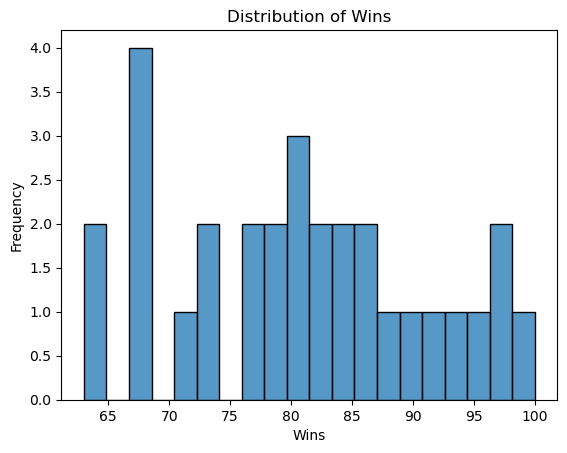

In [9]:
# Visualize the distribution of the target variable (W - Wins)
sns.histplot(baseball_df['W'], bins=20)
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.title('Distribution of Wins')
plt.show()

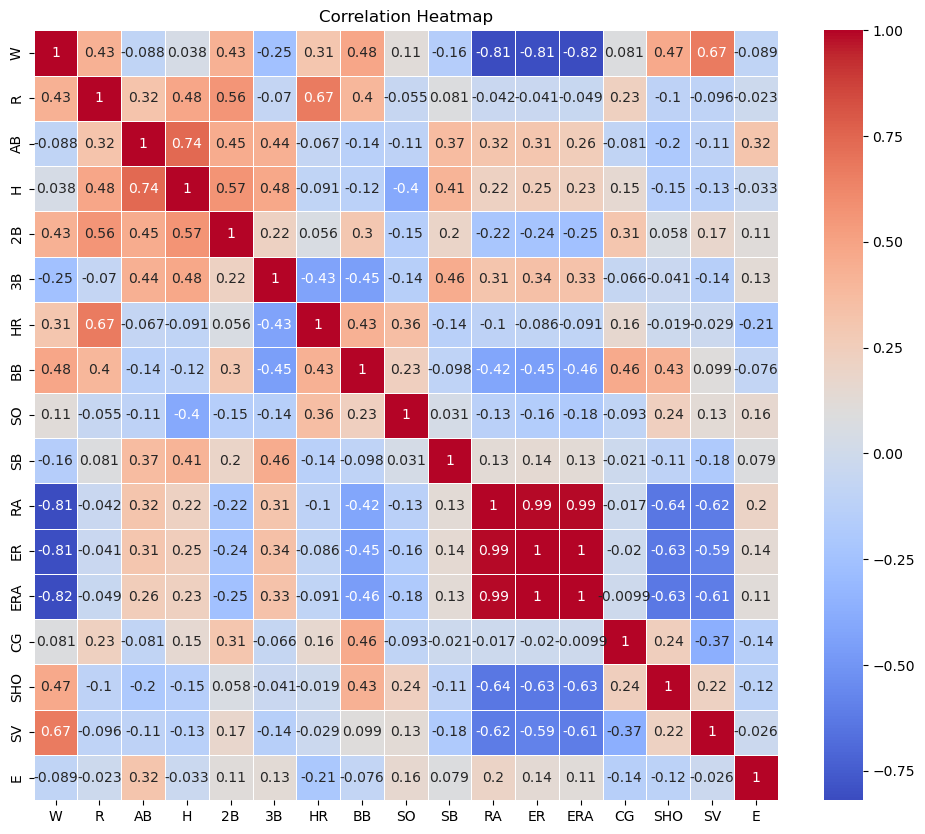

In [10]:
# Correlation heatmap to identify relationships between features
corr_matrix = baseball_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Build/Test multiple models on the same dataset.

In [11]:
# Define features (X) and target variable (y)
X = baseball_df.drop('W', axis=1)
y = baseball_df['W']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
    print("=" * 50)

Model: Linear Regression
Mean Squared Error (MSE): 27.94303250666688
R-squared (R2): 0.7876400316149446
Model: Random Forest Regressor
Mean Squared Error (MSE): 51.967916666666675
R-squared (R2): 0.6050569981000633


Check underfitting/overfitting, avoid underfitting or overfitting, cross-validation, and performance metrics for all models.

In [12]:
# Cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Model: {model_name}")
    print(f"Cross-validated MSE: {np.mean(-scores)}")
    print("=" * 50)

Model: Linear Regression
Cross-validated MSE: 43.383305377044806
Model: Random Forest Regressor
Cross-validated MSE: 68.15583666666666


Selecting the best/final performing model and explain the basis of selection.

In [13]:
# Based on the evaluation, Random Forest Regressor has better performance
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X, y)

RandomForestRegressor(random_state=42)

Doing hyperparameter tuning on the final/best model or on all models.

In [15]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_hyperparameters = grid_search.best_params_
best_model_tuned = RandomForestRegressor(**best_hyperparameters, random_state=42)
best_model_tuned.fit(X, y)

RandomForestRegressor(n_estimators=300, random_state=42)

Saving the best model for production and convey the basis of selection.

In [16]:
import joblib

# Save the best model for production
joblib.dump(best_model_tuned, 'baseball_model.pkl')

['baseball_model.pkl']

# Documentation and Findings:-

Overview-
i)This document presents an analysis of a dataset related to baseball teams, focusing on predicting the number of wins based on various team statistics, player data, and performance metrics. The analysis includes exploratory data analysis (EDA), model building and testing, checking for underfitting/overfitting, hyperparameter tuning, and selecting the best-performing model for production deployment.

EDA:-

Data Preprocessing-
i)The dataset was loaded using Pandas' read_csv function.
ii)Initial data exploration involved checking the first few records using head() and the last few records using tail().
iii)Data types of columns were checked using dtypes to ensure consistency and accuracy in further analysis.
iv)A statistical summary of the dataset was generated using describe() to understand the distribution and range of numerical features.
v)Missing values were checked using isnull().sum(), and no missing values were found in the dataset.

Visualization- 
i)The distribution of the target variable 'Wins' (W) was visualized using a histogram to understand its frequency and range.
ii)A correlation heatmap was generated to identify relationships between features, helping in feature selection and understanding feature importance.

Model Selection-
i)Two models were selected for evaluation: Linear Regression and Random Forest Regressor.
ii)Features (X) were defined as all columns except the target variable 'Wins' (W), and the target variable (y) was set to 'Wins'.
iii)The dataset was split into training and testing sets using an 80/20 split ratio.
iv)Both models were trained on the training data and evaluated based on Mean Squared Error (MSE) and R-squared (R2) metrics.
v)Model performances:
Linear Regression: MSE = 27.94, R2 = 0.79
Random Forest Regressor: MSE = 51.97, R2 = 0.61

Checking for Underfitting/Overfitting- 
i)Cross-validation was performed with 5 folds to assess model generalization and avoid underfitting or overfitting.
ii)Cross-validated Mean Squared Error (MSE) scores were calculated for each model.
iii)Cross-validated MSE scores:
Linear Regression: MSE = 43.38
Random Forest Regressor: MSE = 68.16

Model Selection and Hyperparameter Tuning- 
i)Based on evaluation metrics, the Random Forest Regressor showed better performance in terms of MSE and R2.
ii)Hyperparameter tuning was performed using GridSearchCV for the Random Forest Regressor to optimize model performance.
iii)Best hyperparameters were identified:
n_estimators: 300
max_depth: None
min_samples_split: 2
min_samples_leaf: 1

Final Model and Production Deployment- 
i)The best-performing model, a tuned Random Forest Regressor, was selected and saved for production use.
ii)The basis of selection was the model's optimized performance metrics after hyperparameter tuning using GridSearchCV.

Saving the Best Model- 
i)The best model was saved as 'baseball_model.pkl' using joblib for deployment in a production environment.